In [1]:
import matplotlib.pyplot as plt

In [3]:
boofer_size = 200000
max_fade_time = 10000
boofer = [[0.] for _ in range(boofer_size)]
indices_to_update = [[] for _ in range(max_fade_time)]
global_clock = 0
global_clock_max = 300000


def erase(index, clock_time, value, samples=max_fade_time):
    # ADD UPDATE TO BOOFER, THEN SAY WHAT CLOCK TIME TO MAKE THE UPDATE
    boofer[index].append([0, clock_time + samples, value, samples])
    if index not in indices_to_update[clock_time % max_fade_time]:
        indices_to_update[clock_time % max_fade_time].append(index)

def write(index, clock_time, value, samples=max_fade_time):
    # ADD UPDATE TO BOOFER, THEN SAY WHAT CLOCK TIME TO MAKE THE UPDATE
    boofer[index].append([1, clock_time + samples, value, value/samples])
    if index not in indices_to_update[clock_time % max_fade_time]:
        indices_to_update[clock_time % max_fade_time].append(index)

def pre_housekeeping(clock_time):
    # WE KNOW WHAT INDICES IN BOOFER TO UPDATE FOR ANY GIVEN CLOCK SO WE DO THAT
    for index in indices_to_update[clock_time % max_fade_time]:
        update(index, clock_time)
    indices_to_update[clock_time % max_fade_time].clear()


def update(index, clock_time):

    global global_clock_max

    print("CALLING UPDATEEEE")

    ## WE ARE RESOLVING ALL RIPE UPDATES INTO MAIN BOOFER VAL
    content = boofer[index]
    ripe_updates = []

    for i in range(1, len(content)):
        update = content[i]
        if not update[0]: ##THIS MEANS ITS AN ERASE
            time_til_ripe = (update[1] - clock_time) % global_clock_max
            if time_til_ripe <= 0:
                ripe_updates.append(i)
                content[0] *= update[2]

    ## ERASE BEFORE WRITE JUST FOR CONSISTENT BEHAVIOR
                
    for i in range(1, len(content)):
        update = content[i]
        if update[0]: ##THIS MEANS ITS A WRITE
            time_til_ripe = (update[1] - clock_time) % global_clock_max
            if time_til_ripe <= 0:
                ripe_updates.append(i)
                content[0] += update[2]
    print('resolving to:', content[0])


    boofer[index] = [_[i] for i in range(len(content)) if i not in ripe_updates]



def read(index, clock_time):

    global global_clock_max
    ## DYNAMICALLY READ FADING IN ERASES AND WRITES
    content = boofer[index]
    value = content[0] ## THIS IS NOT IN PLACE

    for i in range(1, len(content)):
        update = content[i]
        if not update[0]: ## ERASE
            time_til_ripe = (update[1] - clock_time) % global_clock_max
            frac_offset = (update[3] * update[2])/(1-update[2])
            factor = (time_til_ripe + frac_offset) / (time_til_ripe + frac_offset + 1)
            update *= factor
            

    ## ERASE BEFORE WRITE JUST FOR CONSISTENT BEHAVIOR
    
    for i in range(1, len(content)):
        update = content[i]
        if update[0]: ## WRITE
            time_til_ripe = (update[1] - clock_time) % global_clock_max
            target_val = update[2]
            fading_in_val = target_val - (time_til_ripe * update[3])
            value += fading_in_val
    return value



def full_cycle(heads):
    global global_clock_max
    global global_clock

    pre_housekeeping(global_clock)

    wet_signal = 0

    for head in heads:
        if head[0] == -1: 
            wet_signal += read(head[1], global_clock)
        if head[0] == 0: 
            erase(head[1], global_clock, head[2])
        if head[0] == 1: 
            write(head[1], global_clock, head[2])

    global_clock = (global_clock + 1) % global_clock_max



    
    





        
        
        
        
    
    



    
    

    
    

        
            
        
            
            
            
    
    
    






In [5]:
from tqdm import tqdm

0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3211774.12it/s]

READY TO RIP


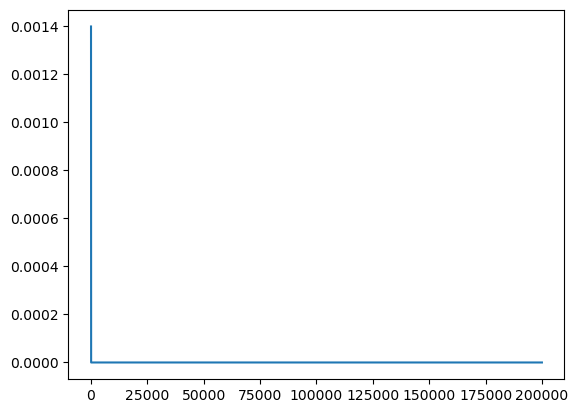

2000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 886406.77it/s]

READY TO RIP


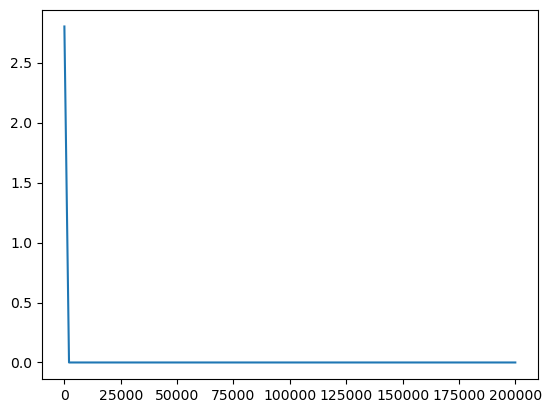

4000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3563040.17it/s]

READY TO RIP


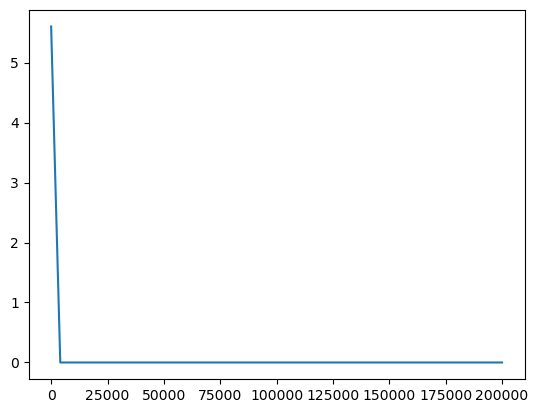

6000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3598345.94it/s]


READY TO RIP


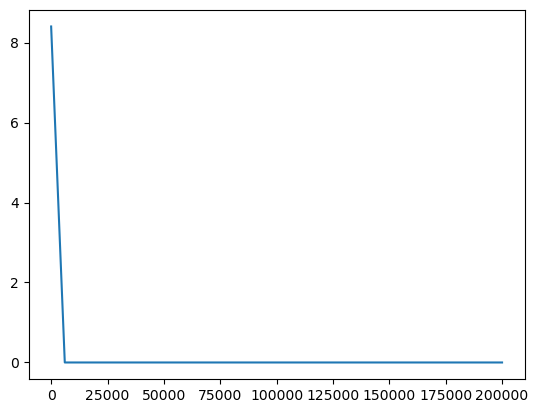

8000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3525276.94it/s]


READY TO RIP


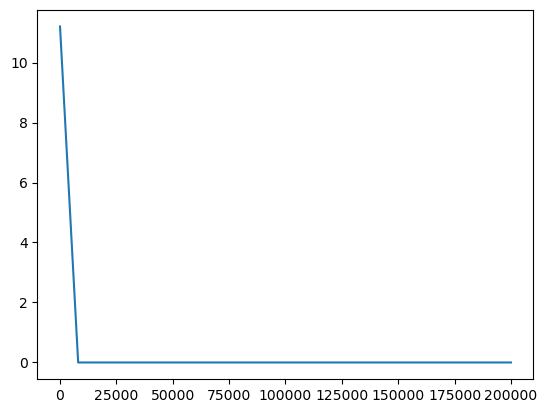

CALLING UPDATEEEE
resolving to: 14.0
10000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3647173.30it/s]


0 {
READY TO RIP


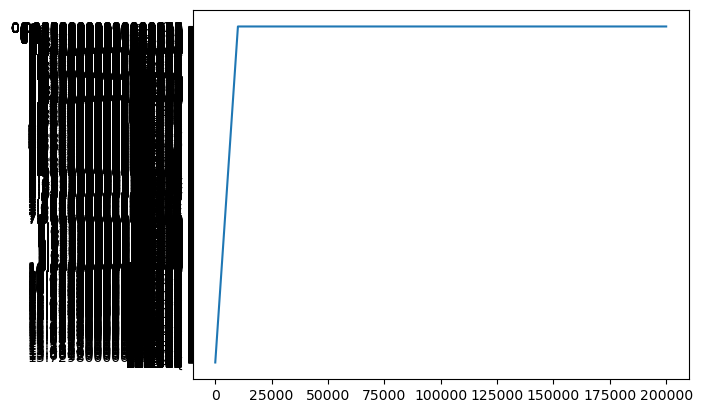

CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
C

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3314829.90it/s]

0 {
1 {
2 {
3 {
4 {
5 {
6 {
7 {
8 {
9 {
10 {
11 {
12 {
13 {
14 {
15 {
16 {
17 {
18 {
19 {
20 {
21 {
22 {
23 {
24 {
25 {
26 {
27 {
28 {
29 {
30 {
31 {
32 {
33 {
34 {
35 {
36 {
37 {
38 {
39 {
40 {
41 {
42 {
43 {
44 {
45 {
46 {
47 {
48 {
49 {
50 {
51 {
52 {
53 {
54 {
55 {
56 {
57 {
58 {
59 {
60 {
61 {
62 {
63 {
64 {
65 {
66 {
67 {
68 {
69 {
70 {
71 {
72 {
73 {
74 {
75 {
76 {
77 {
78 {
79 {
80 {
81 {
82 {
83 {
84 {
85 {
86 {
87 {
88 {
89 {
90 {
91 {
92 {
93 {
94 {
95 {
96 {
97 {
98 {
99 {
100 {
101 {
102 {
103 {
104 {
105 {
106 {
107 {
108 {
109 {
110 {
111 {
112 {
113 {
114 {
115 {
116 {
117 {
118 {
119 {
120 {
121 {
122 {
123 {
124 {
125 {
126 {
127 {
128 {
129 {
130 {
131 {
132 {
133 {
134 {
135 {
136 {
137 {
138 {
139 {
140 {
141 {
142 {
143 {
144 {
145 {
146 {
147 {
148 {
149 {
150 {
151 {
152 {
153 {
154 {
155 {
156 {
157 {
158 {
159 {
160 {
161 {
162 {
163 {
164 {
165 {
166 {
167 {
168 {
169 {
170 {
171 {
172 {
173 {
174 {
175 {
176 {
177 {
178 {
179 {
180 {
181 {
182 {
183 {
184 {


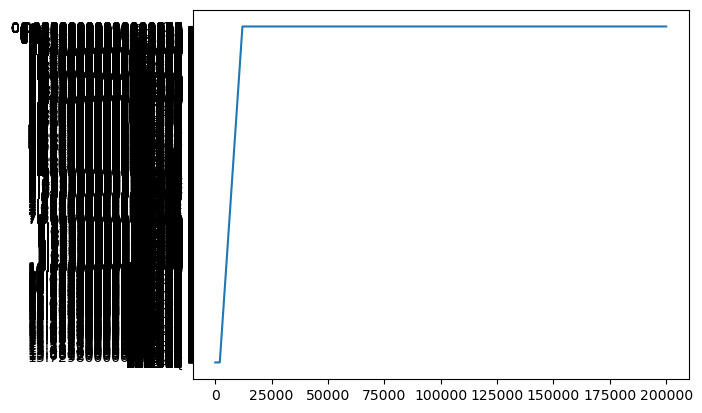

CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
C

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3129283.61it/s]

0 {
1 {
2 {
3 {
4 {
5 {
6 {
7 {
8 {
9 {
10 {
11 {
12 {
13 {
14 {
15 {
16 {
17 {
18 {
19 {
20 {
21 {
22 {
23 {
24 {
25 {
26 {
27 {
28 {
29 {
30 {
31 {
32 {
33 {
34 {
35 {
36 {
37 {
38 {
39 {
40 {
41 {
42 {
43 {
44 {
45 {
46 {
47 {
48 {
49 {
50 {
51 {
52 {
53 {
54 {
55 {
56 {
57 {
58 {
59 {
60 {
61 {
62 {
63 {
64 {
65 {
66 {
67 {
68 {
69 {
70 {
71 {
72 {
73 {
74 {
75 {
76 {
77 {
78 {
79 {
80 {
81 {
82 {
83 {
84 {
85 {
86 {
87 {
88 {
89 {
90 {
91 {
92 {
93 {
94 {
95 {
96 {
97 {
98 {
99 {
100 {
101 {
102 {
103 {
104 {
105 {
106 {
107 {
108 {
109 {
110 {
111 {
112 {
113 {
114 {
115 {
116 {
117 {
118 {
119 {
120 {
121 {
122 {
123 {
124 {
125 {
126 {
127 {
128 {
129 {
130 {
131 {
132 {
133 {
134 {
135 {
136 {
137 {
138 {
139 {
140 {
141 {
142 {
143 {
144 {
145 {
146 {
147 {
148 {
149 {
150 {
151 {
152 {
153 {
154 {
155 {
156 {
157 {
158 {
159 {
160 {
161 {
162 {
163 {
164 {
165 {
166 {
167 {
168 {
169 {
170 {
171 {
172 {
173 {
174 {
175 {
176 {
177 {
178 {
179 {
180 {
181 {
182 {
183 {
184 {


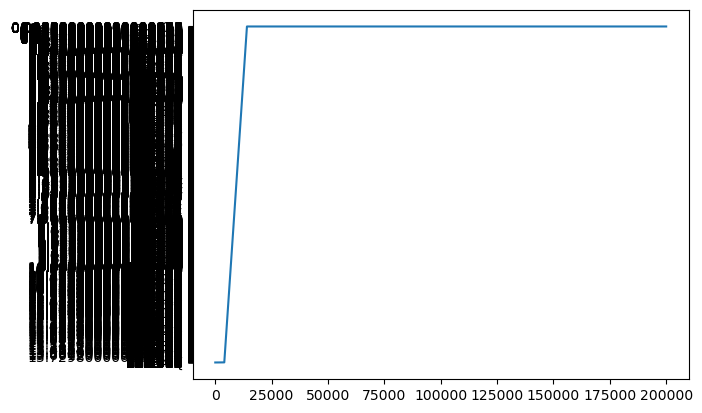

CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
CALLING UPDATEEEE
resolving to: 14.0
C

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3045121.01it/s]

0 {
1 {
2 {
3 {
4 {
5 {
6 {
7 {
8 {
9 {
10 {
11 {
12 {
13 {
14 {
15 {
16 {
17 {
18 {
19 {
20 {
21 {
22 {
23 {
24 {
25 {
26 {
27 {
28 {
29 {
30 {
31 {
32 {
33 {
34 {
35 {
36 {
37 {
38 {
39 {
40 {
41 {
42 {
43 {
44 {
45 {
46 {
47 {
48 {
49 {
50 {
51 {
52 {
53 {
54 {
55 {
56 {
57 {
58 {
59 {
60 {
61 {
62 {
63 {
64 {
65 {
66 {
67 {
68 {
69 {
70 {
71 {
72 {
73 {
74 {
75 {
76 {
77 {
78 {
79 {
80 {
81 {
82 {
83 {
84 {
85 {
86 {
87 {
88 {
89 {
90 {
91 {
92 {
93 {
94 {
95 {
96 {
97 {
98 {
99 {
100 {
101 {
102 {
103 {
104 {
105 {
106 {
107 {
108 {
109 {
110 {
111 {
112 {
113 {
114 {
115 {
116 {
117 {
118 {
119 {
120 {
121 {
122 {
123 {
124 {
125 {
126 {
127 {
128 {
129 {
130 {
131 {
132 {
133 {
134 {
135 {
136 {
137 {
138 {
139 {
140 {
141 {
142 {
143 {
144 {
145 {
146 {
147 {
148 {
149 {
150 {
151 {
152 {
153 {
154 {
155 {
156 {
157 {
158 {
159 {
160 {
161 {
162 {
163 {
164 {
165 {
166 {
167 {
168 {
169 {
170 {
171 {
172 {
173 {
174 {
175 {
176 {
177 {
178 {
179 {
180 {
181 {
182 {
183 {
184 {


In [ ]:
for i in (range(100000)):
    heads = [[1, i, 14.]]
    full_cycle(heads)
    if i % 2000 == 0:
        print(i)
        read_buff = []
        for i in tqdm(range(boofer_size)):
            result = read(i, global_clock)
            if isinstance(result, str):
                print(i, result)
            read_buff.append(result)
        print("READY TO RIP")
        plt.plot(read_buff)
        plt.show()